<a href="https://colab.research.google.com/github/Thomas-D40/deep-learning/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN)

Avec le dataset minst de zalando, nous avions pu faire en sorte d'avoir en entrée une matrice en deux dimensions où la seconde représentait notre nombre de paramètres/neuronnes de la première couche.

Néanmoins, cette approche peut aisément échouer sur des images non normalisés où les objets peuvent varier en taille, ce qui fait que le contexte spatial est importante.

L'objectif du CNN va être d'extraire des caractéristiques avant de les fournir à notre réseau de neuronnes densémment connectés



La convolution consiste à réaliser la multiplication des pixels du filtre et de l'image 2 à 2 puis à appliquer au pixel du centre du filtre la nouvelle valeur.

## L'extraction de caractériques:
deux règles:
- extraction quelque soit la position de la caractéristique
- extraction de caractéristique utile


Pour résoudre cela avec un système de filtres sur les images

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving salon.png to salon.png
User uploaded file "salon.png" with length 6915 bytes


In [ ]:
import numpy as np
import cv2

def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image

# https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [ ]:
image = processImage('salon.png')

In [ ]:
image.shape

(181, 279)

In [ ]:
filtre = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

In [ ]:
output = convolve2D(image, filtre, 2)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 155. ... 179.   0.   0.]
 ...
 [  0.   0. 149. ...  84.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [ ]:
cv2.imwrite('salon_horizontal.png', output)

True

In [ ]:
filtre_vertical = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

In [ ]:
output_vertical = convolve2D(image, filtre_vertical, padding=2)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 155. ... 179.   0.   0.]
 ...
 [  0.   0. 149. ...  84.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [ ]:
cv2.imwrite('salon_vertical.png', output_vertical)

True

# Padding & MaxPooling

Padding: pour appliquer un filtre en 3*3 sur l'intégralité d'une image, alors on ajoute des 0 sur les côtés de l'image pour permettre au filtre de s'appliquer partout et garder la même taille d'images

Pooling: l'objectif est de parvenir à réduire la taille de l'image. Par exemple, j'ai une image en 3 * 3, j'applique un pooling 2 * 2 de sorte à ce que ce dernier s'applique en haut à droite sur les 4 pixels et garde la valeur maximale, puis en haut à gauche, en bas à droite, en base à gauche et j'obtiens alors 4 valeurs qui permettent de conserver les caractéristiques de l'image

L'objectif est alors de réaliser le pattern: Convolution/Padding => Pooling
puis de prendre le résultat et de réitérer jusqu'à pouvoir obtenir un format de données (xxx, yyy) que l'on pourra fournir à notre réseau de neuronnes dense

# Conv2D de TensorFlow

Les couleurs sont définis en RGB, ce qui fait que pour les images de zalando en (28,28) en ajoutant la dimension des couleurs selon RBG, on aurait des images en (28,28,3)

In [ ]:
import tensorflow as tf

data = tf.keras.datasets.fashion_mnist
(training_image, training_labels), (test_image, test_labels) = data.load_data()


In [ ]:
training_image = training_image / 255.0
test_image = test_image / 255.0

In [ ]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [ ]:
training_image.shape

(60000, 28, 28)

In [ ]:
training_images = training_image.reshape(60000, 28, 28, 1)

In [ ]:
test_images = test_image.reshape(10000, 28, 28, 1)

# Modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # Stochastique Gradient Descent

adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)


model = Sequential([
    # Couche de CNN
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                           padding="valid", activation="relu", input_shape=(28,28,1)),
    # Operation de pooling pour réduire la taille des images
    # Il existe d'autres formes de pooling comme l'average
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # Seconde couche CNN
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # applatif les images
    tf.keras.layers.Flatten(),

    # Dense
    tf.keras.layers.Dense(128, "relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, "softmax")
    ])

model.compile(adam, "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
5*5*64

1600

In [ ]:
(3*3 + 1)*64 # le + 1 est le biais

640

In [ ]:
(64 * 64 * 9) + 64 # Pour la seconde étape, on a kernel 3 * 3 => 9, 64 lignes de données, 64 params + 64 biais

36928

In [ ]:
128 * 1600 + 128

204928

In [ ]:
h = model.fit(training_image, training_labels, epochs=50,
              validation_data=[test_image, test_labels],
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                         tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 46ms/step - accuracy: 0.7421 - loss: 0.6927 - val_accuracy: 0.8277 - val_loss: 0.4711
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 45ms/step - accuracy: 0.8377 - loss: 0.4352 - val_accuracy: 0.8569 - val_loss: 0.3940
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 46ms/step - accuracy: 0.8470 - loss: 0.4058 - val_accuracy: 0.8458 - val_loss: 0.4215
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 46ms/step - accuracy: 0.8503 - loss: 0.4002 - val_accuracy: 0.8517 - val_loss: 0.3957
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 45ms/step - accuracy: 0.8576 - loss: 0.3826 - val_accuracy: 0.8657 - val_loss: 0.3750
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 45ms/step - accuracy: 0.8569 - loss: 0.3880 - val_accuracy: 0.8569 - val_loss: 0.3995
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.8560 - loss: 0.3888 - val_accuracy: 0.8552 - val_loss: 0.4246
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 46ms/step - accuracy: 0.

# Projet: Classification d'objets Recyclables ou Non


Waste Classification Dataset: https://www.kaggle.com/datasets/techsash/waste-classification-data/code

In [11]:
from google.colab import drive
drive.mount('./gdrive')

Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).


In [ ]:
!ls '/content/gdrive/MyDrive/Datasets IA'

archive.zip


In [12]:
!unzip '/content/gdrive/MyDrive/Datasets IA/archive.zip'


Archive:  /content/gdrive/MyDrive/Datasets IA/archive.zip
replace DATASET/TEST/O/O_12568.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace DATASET/TEST/O/O_12569.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [14]:
import os

data_dir = 'DATASET'

In [15]:
train_dir = os.path.join(data_dir, 'TRAIN')
test_dir = os.path.join(data_dir, 'TEST')

In [16]:
os.listdir(train_dir)

['R', 'O']

In [10]:
train_R_dir = os.path.join(train_dir, 'R')
train_O_dir = os.path.join(train_dir, 'O')
test_R_dir = os.path.join(test_dir, 'R')
test_O_dir = os.path.join(test_dir, 'O')

In [ ]:
len(os.listdir(train_R_dir)), len(os.listdir(train_O_dir)), len(os.listdir(test_R_dir)), len(os.listdir(test_O_dir))

(9999, 12565, 1112, 1401)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
r_index = 568
o_index = 1562

recyclable_imgs = [os.path.join(train_R_dir, filename) for filename in os.listdir(train_R_dir)]
organic_imgs = [os.path.join(train_O_dir, filename) for filename in os.listdir(train_O_dir)]

img_r = mpimg.imread(recyclable_imgs[r_index])
img_o = mpimg.imread(organic_imgs[o_index])

In [ ]:
recyclable_imgs[r_index]

'DATASET/TRAIN/R/R_1770.jpg'

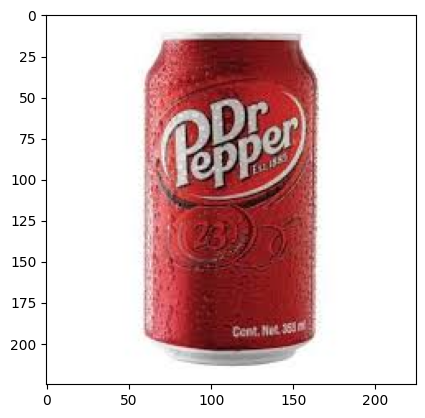

In [ ]:
plt.imshow(img_r)

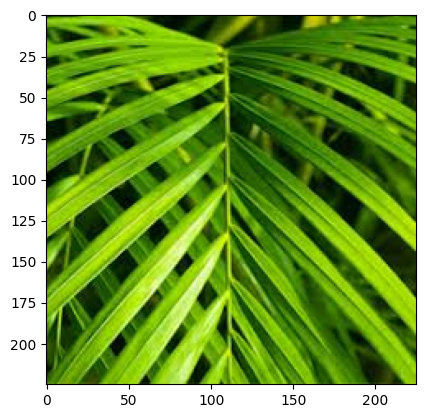

In [ ]:
plt.imshow(img_o)

# Charges les images avec ImageDataGenerator

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_data_generator.flow_from_directory(
    directory = train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
    )

test_generator = train_data_generator.flow_from_directory(
    directory = test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
    )

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
batch_img = next(iter(train_generator))
image, label = batch_img
image.shape

(32, 224, 224, 3)

In [ ]:
train_generator.class_indices

{'O': 0, 'R': 1}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # Stochastique Gradient Descent


model = Sequential([
    # Extraction des caractéristiques
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                           padding="valid", activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # applatif les images
    tf.keras.layers.Flatten(),

    # Dense
    tf.keras.layers.Dense(128, "relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, "sigmoid")
    ])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,619,713 (9.99 MB)

 Trainable params: 2,619,713 (9.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
h = model.fit(train_generator, epochs=150,
              validation_data=test_generator,
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6),
                         tf.keras.callbacks.ModelCheckpoint('best_model_recyclage.keras', save_best_only=True)])

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 68s 84ms/step - accuracy: 0.7613 - loss: 0.4937 - val_accuracy: 0.7131 - val_loss: 0.6302
Epoch 2/150
706/706 ━━━━━━━━━━━━━━━━━━━━ 69s 76ms/step - accuracy: 0.8241 - loss: 0.4075 - val_accuracy: 0.8472 - val_loss: 0.3751
Epoch 3/150
706/706 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.8353 - loss: 0.3806 - val_accuracy: 0.8217 - val_loss: 0.4369
Epoch 4/150
706/706 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - accuracy: 0.8473 - loss: 0.3589 - val_accuracy: 0.8826 - val_loss: 0.2984
Epoch 5/150
706/706 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.8642 - loss: 0.3324 - val_accuracy: 0.8480 - val_loss: 0.4106
Epoch 6/150
706/706 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.8709 - loss: 0.3166 - val_accuracy: 0.8981 - val_loss: 0.2645
Epoch 7/150
706/706 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.8766 - loss: 0.3054 - val_accuracy: 0.9065 - val_loss: 0.2487
Epoch 8/150
706/706 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.8752 - loss: 0.3025 - val_

# Data Augmentation

L'objectif est d'augmenter notre dataset en appliquant sur les images de transformation de type rotation, bascule en noir & blanc, ajout de bruit, etc...

Ceci va notamment permettre de démultiplier le dataset tout en augmentant les types de situation sur lesquelles sera entrainé notre réseau de neuronnes

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Avant augmentation
train_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

#Après augmentation
train_data_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode="nearest")
test_data_generator = ImageDataGenerator(rescale=1./255)
# On ne l'applique pas sur le test_set

In [11]:
train_generator = train_data_generator.flow_from_directory(
    directory = train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
    )

test_generator = train_data_generator.flow_from_directory(
    directory = test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
    )

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # Stochastique Gradient Descent


model = Sequential([
    # Extraction des caractéristiques
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                           padding="valid", activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # applatir les images
    tf.keras.layers.Flatten(),

    # Dense
    tf.keras.layers.Dense(128, "relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, "sigmoid")
    ])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
h = model.fit(train_generator, epochs=10,
              validation_data=test_generator,
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2),
                         tf.keras.callbacks.ModelCheckpoint('best_model_recyclage.keras', save_best_only=True)])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
  8/706 ━━━━━━━━━━━━━━━━━━━━ 1:14:45 6s/step - accuracy: 0.5037 - loss: 0.6952

KeyboardInterrupt: 

# Transfert Learning

L'idée est d'utiliser la partie extraction de caractéristiques de la phase de convolution et de pouvoir l'appliquer à un autre réseau de couches denses

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,239,428 (19.99 MB)

 Trainable params: 2,619,713 (9.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,619,715 (9.99 MB)

## l'API Fonctionnelle de Tensorflow pour récupérer des modèles déjà entrainés sur ImageNet

L'objectif est de récupérer la partie CNN de Vgg16, qui a été entrainé sur ImageNet pour définir près de 1000 classes et d'y accoler notre réseau dense qui a pour objectif de savoir si un objet est recyclable ou non (sortie binaire)

In [2]:
from tensorflow.keras.applications import vgg16

pretrained_model = vgg16.VGG16(include_top=True, weights='imagenet', input_shape=(224,224,3))

In [3]:
pretrained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
pretrained_model = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3)) # include_top=False permet de ne pas récupérer les couches dense

In [18]:
pretrained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Il est possible de définir le model en réalisant d'abord une instance vide puis plusieurs add

### API Sequential

In [19]:
model = Sequential()

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                           padding="valid", activation="relu", input_shape=(224,224,3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,792 (7.00 KB)

 Trainable params: 1,792 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 64)        │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,792 (7.00 KB)

 Trainable params: 1,792 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

### API Functional

In [32]:
inputs = tf.keras.Input(shape=(224,224,3))
x =  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                           padding="valid", activation="relu")(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
print(x)
outputs = tf.keras.layers.Flatten()(x)

<KerasTensor shape=(None, 111, 111, 64), dtype=float32, sparse=False, name=keras_tensor_69>


In [28]:
model = tf.keras.Model(inputs, outputs)

In [29]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 788544)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,792 (7.00 KB)

 Trainable params: 1,792 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

### Utilisation des filtres de VGG16

La particularité est qu'il faudra dire à TensorFlow de ne pas réentrainer les pretrained_model de VGG16

In [6]:
pretrained_model.trainable=False

In [18]:
inputs = tf.keras.Input(shape=(224,224,3))
x = pretrained_model(inputs)
x = tf.keras.layers.Flatten()(x)
print(x)
x = tf.keras.layers.Dense(128, "relu")(x)
outputs = tf.keras.layers.Dense(1, "sigmoid")(x)
print(outputs)

model = tf.keras.Model(inputs, outputs)


<KerasTensor shape=(None, 25088), dtype=float32, sparse=False, name=keras_tensor_49>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_51>


In [34]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [20]:
model.fit(train_generator, epochs=5, validation_data=test_generator, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2),
                         tf.keras.callbacks.ModelCheckpoint('recyclage_with_VGG16.keras', save_best_only=True)])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
  1/706 ━━━━━━━━━━━━━━━━━━━━ 4:28:25 23s/step - accuracy: 0.7188 - loss: 0.5945

KeyboardInterrupt: 

# Fine-Tuning

In [21]:
pretrained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

L'objectif ici est de n'entrainer que le block 5

In [22]:
pretrained_model.trainable = True

In [23]:
pretrained_model.layers[:-4]

[<InputLayer name=input_layer_1, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>]

In [24]:
for layer in pretrained_model.layers[:-4]:
    layer.trainable = False

In [25]:
pretrained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [26]:
inputs = tf.keras.Input(shape=(224,224,3))
x = pretrained_model(inputs)
x = tf.keras.layers.Flatten()(x)
print(x)
x = tf.keras.layers.Dense(128, "relu")(x)
outputs = tf.keras.layers.Dense(1, "sigmoid")(x)
print(outputs)

model = tf.keras.Model(inputs, outputs)

<KerasTensor shape=(None, 25088), dtype=float32, sparse=False, name=keras_tensor_54>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_56>


In [27]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 10,290,945 (39.26 MB)

 Non-trainable params: 7,635,264 (29.13 MB)